# BBC TEXT CLASSIFICATION PROJECT

--------
Overview
--------

This project will use the deployment of an unsupervised learning model, NMF. The objective is to classify varying BBC articles into their respective groups: business, tech, sport, entertainment or politics

After that is done, we will compare it to a supervised learning model based on its accuracy.

Let's begin!

In [34]:
#Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploratory Data Analysis

In [35]:
train_data=pd.read_csv("BBC News Train.csv")
test_data=pd.read_csv("BBC News Test.csv")
sample_sol=pd.read_csv("BBC News Sample Solution.csv")

train_data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [36]:
test_data.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [37]:
sample_sol.head()

,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,business
3,459,entertainment
4,1020,politics


In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [39]:
train_data['ArticleId'].nunique()

1490

In [40]:
train_data['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [41]:
train_data['categoryId']= train_data['Category'].factorize()[0]
train_data.head(20)

,ArticleId,Text,Category,categoryId
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0
5,1582,howard truanted to play snooker conservative...,politics,2
6,651,wales silent on grand slam talk rhys williams ...,sport,3
7,1797,french honour for director parker british film...,entertainment,4
8,2034,car giant hit by mercedes slump a slump in pro...,business,0
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,4


In [42]:
cat = train_data[["Category","categoryId"]].drop_duplicates().sort_values('categoryId')
cat

,Category,categoryId
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


In [43]:
train_data.groupby('Category').categoryId.count()


Category
business         336
entertainment    273
politics         274
sport            346
tech             261
Name: categoryId, dtype: int64

[Text(0.5, 1.0, 'Categories')]

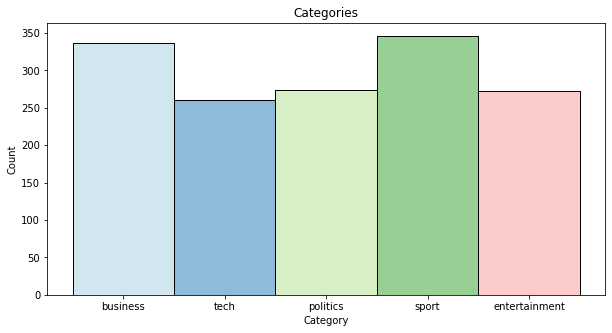

In [44]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.set_style=('Whitegrid')
sns.histplot(x='Category',hue='Category',legend=False, data=train_data, palette="Paired").set(title='Categories')

From the text data below, we see that there is quite a good amount of text to be processed. We will be preprocessing the text column so that it can be readable to the NLP algorithm. The words already seem to be in lower case which is an important part of preprocessing. Since the text is from BBC, it can be infered that there are no spelling errors, visually there is none from this text sample. We will be deploying other cleaning techniques as you will see in subsequent coding 

In [45]:
train_data['Text'][2]

'bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service poll believe the world economy is worsening.  most respondents also said their national economy was getting worse. but when asked about their own family s financial outlook  a majority in 14 countries said they were positive about the future. almost 23 000 people in 22 countries were questioned for the poll  which was mostly conducted before the asian tsunami disaster. the poll found that a majority or plurality of people in 13 countries believed the economy was going downhill  compared with respondents in nine countries who believed it was improving. those surveyed in three countries were split. in percentage terms  an average of 44% of respondents in each country said the world economy was getting worse  compared to 34% who said it was improving. similarly  48% were pessimistic about their national economy  while 41% were optimistic. and 47% saw their family s economic conditions impr

# Text Preprocessing

Text preprocessing is a method to clean the text data and make it ready to feed data to the model. Text data contains noise in various forms like emotions, punctuation, text in a different case. This is an essential step in NLP as it is imperitive to make the text "readable" for the computer. We will be employing the use of different cleaning techniques under one class function. They are listed below:

Removing numbers: Removing numbers from the text like “1,2,3,4,5…” We usually remove numbers when we do text clustering or getting keyphrases as we numbers doesn’t give much importance to get the main words.

Removing punctuation: Removing punctuation from the text like “.?!” and also the symbols like “@#$” 

Tokenization: 
Word tokenize-Tokenize words to get the tokens of the text i.e breaking the sentences into list of words.
Sentence tokenize-If the there are more than 1 sentence split it i.e breaking the sentences to a list of sentence.

Stop words removal: Remove irrelevant words using nltk stop words like “is,the,a” etc from the sentences as they don’t carry any information.

Lemmatization: Lemmatization is similar to stemming but it brings context to the words.So it links words with similar meaning to one word.lemmatization does morphological analysis of the words. In short, lemmatize the text so as to get its root form eg: functions,funtionality as function

In [46]:
#EDA and preprocessing
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import sent_tokenize 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
import string
from string import punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\javel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\javel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\javel\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [47]:
class TextPreprocessing():
    def __int__(self, text):
        self.text = text
        
    #Takes string input and return a clean text without numbers
    def remove_numbers(self,text):
        return ''.join(c for c in text if not c.isdigit())

    #Takes string input and clean string without punctuations.
    def remove_punct(self,text):
        return ''.join(c for c in text if c not in punctuation)

    
    #Takes string input and return list of sentences.
    def sentence_tokenize(self,text):
        sent_list = []
        return list(nltk.sent_tokenize(text))

    def word_tokenize(self,text):
        return [w for sent in nltk.sent_tokenize(text) for w in nltk.word_tokenize(sent)]

    #Removes all the stop words like "is,the,a, etc."
    def remove_stopwords(self, word):
        stop_words = stopwords.words('english')
        return ' '.join([w for w in nltk.word_tokenize(word) if w not in stop_words])
    
      
    def lemmatize(self,text):
        wordnet_lemmatizer = WordNetLemmatizer()
        lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
        return ' '.join(lemmatized_word)


    def preprocess(self,text):
        sentence_tokens = self.sentence_tokenize(text)
        word_list = []
        for each_sent in sentence_tokens:
            lemmatized_sent = self.lemmatize(each_sent)
            clean_text = self.remove_numbers(lemmatized_sent)
            clean_text = self.remove_punct(clean_text)
            clean_text = self.remove_stopwords(clean_text)
            word_tokens = self.word_tokenize(clean_text)
            word_list.extend(iter(word_tokens))
        return word_list

As you can see below, Test case has been cleaned and tokenized under the class function. We will now deploy it over the entire Dataframe column


In [48]:
#Test case
txt = train_data['Text'][2]
pr = TextPreprocessing()
print(pr.preprocess(txt))




['bbc', 'poll', 'indicates', 'economic', 'gloom', 'citizen', 'majority', 'nation', 'surveyed', 'bbc', 'world', 'service', 'poll', 'believe', 'world', 'economy', 'worsening', 'respondent', 'also', 'said', 'national', 'economy', 'wa', 'getting', 'worse', 'asked', 'family', 'financial', 'outlook', 'majority', 'country', 'said', 'positive', 'future', 'almost', 'people', 'country', 'questioned', 'poll', 'wa', 'mostly', 'conducted', 'asian', 'tsunami', 'disaster', 'poll', 'found', 'majority', 'plurality', 'people', 'country', 'believed', 'economy', 'wa', 'going', 'downhill', 'compared', 'respondent', 'nine', 'country', 'believed', 'wa', 'improving', 'surveyed', 'three', 'country', 'split', 'percentage', 'term', 'average', 'respondent', 'country', 'said', 'world', 'economy', 'wa', 'getting', 'worse', 'compared', 'said', 'wa', 'improving', 'similarly', 'pessimistic', 'national', 'economy', 'optimistic', 'saw', 'family', 'economic', 'condition', 'improving', 'said', 'getting', 'worse', 'poll', 

In [49]:
#Applying class function to the entire text column, this may take a while...
train_data['Clean text'] = train_data.apply(lambda row: pr.preprocess(row["Text"]), axis=1 )


In [50]:
train_data['num_words'] = train_data['Clean text'].apply(lambda lst: len(lst))
train_data.head(10)

,ArticleId,Text,Category,categoryId,Clean text,num_words
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0,"[worldcom, exboss, launch, defence, lawyer, de...",185
1,154,german business confidence slides german busin...,business,0,"[german, business, confidence, slide, german, ...",199
2,1101,bbc poll indicates economic gloom citizens in ...,business,0,"[bbc, poll, indicates, economic, gloom, citize...",281
3,1976,lifestyle governs mobile choice faster bett...,tech,1,"[lifestyle, governs, mobile, choice, faster, b...",352
4,917,enron bosses in $168m payout eighteen former e...,business,0,"[enron, boss, payout, eighteen, former, enron,...",206
5,1582,howard truanted to play snooker conservative...,politics,2,"[howard, truanted, play, snooker, conservative...",161
6,651,wales silent on grand slam talk rhys williams ...,sport,3,"[wale, silent, grand, slam, talk, rhys, willia...",187
7,1797,french honour for director parker british film...,entertainment,4,"[french, honour, director, parker, british, fi...",134
8,2034,car giant hit by mercedes slump a slump in pro...,business,0,"[car, giant, hit, mercedes, slump, slump, prof...",259
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,4,"[fockers, fuel, festive, film, chart, comedy, ...",141


The number of "clean" words per article column was added to the dataframe. We see from the histplot below that most articles are around 200 words. But, there are some huge outliers past the 700 word mark. We will remove them from the model for better accuracy 

[Text(0.5, 1.0, 'Number of Words per Article')]

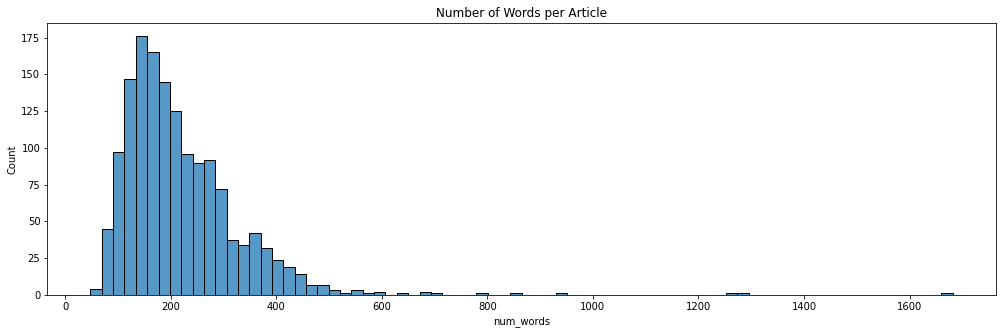

In [51]:
fig, ax = plt.subplots(figsize=(17, 5))
sns.set_style=('Whitegrid')
sns.histplot(x='num_words',legend=False, data=train_data, palette="Set2").set(title='Number of Words per Article')

In [52]:
#remove outlier articles (longer than 700 words)
train_data = train_data[train_data['num_words'] < 700]
len(train_data)

1483

# Model Building and Training

In [53]:
#Model imports
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import itertools
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [54]:
def predict(w_matrix):
    sortedW = np.argsort(w_matrix)
    n_predictions, maxValue = sortedW.shape
    predictions = [[sortedW[i][maxValue - 1]] for i in range(n_predictions)]
    topics = np.empty(n_predictions, dtype = np.int64)
    for i in range(n_predictions):
        topics[i] = predictions[i][0]
    return topics

In [55]:
def label_permute(ytdf,yp,n=5):
    """
    ytdf: labels dataframe object
    yp: clustering label prediction output
    Returns permuted label order and accuracy. 
    Example output: (3, 4, 1, 2, 0), 0.74 
    """
    perms = list(itertools.permutations([0, 1, 2, 3, 4]))    #create permutation list
    best_labels = []
    best_acc = 0 
    current = {}
    labels = ['business', 'tech', 'politics', 'sport', 'entertainment']
    for perm in perms:
        for i in range(n):
            current[labels[i]] = perm[i]
            if len(current) == 5:
                conditions = [
                    (ytdf['Category'] == current['business']),
                    (ytdf['Category'] == current['tech']),
                    (ytdf['Category'] == current['politics']),
                    (ytdf['Category'] == current['sport']),
                    (ytdf['Category'] == current['entertainment'])]
                ytdf['test'] = ytdf['Category'].map(current)
                current_accuracy = accuracy_score(ytdf['test'], yp)
                if current_accuracy > best_acc: 
                    best_acc = current_accuracy
                    best_labels = perm
                    ytdf['best'] = ytdf['test']
    return best_labels, best_acc

In [56]:

#create vectorizer
train_data["Clean text"] = train_data['Clean text'].astype(str)
tfidvec = TfidfVectorizer(min_df = 2,
                          max_df = 0.95,
                          norm = 'l2',
                          stop_words = 'english')
tfidvec_train = tfidvec.fit_transform(train_data['Clean text'])

#create model
nmf_model = NMF(n_components=5, 
                init='nndsvda', 
                solver = 'mu',
                beta_loss = 'kullback-leibler',
                l1_ratio = 0.5,
                random_state = 101)
nmf_model.fit(tfidvec_train)

#view results
yhat_train = predict(nmf_model.transform(tfidvec_train))
label_order, accuracy = label_permute(train_data, yhat_train )
print('accuracy=', accuracy)

accuracy= 0.9507754551584626


In [57]:
label_dict = {4:'business', 2:'tech', 1:'politics', 0:'sport', 3:'entertainment'}
for i in range(5):
    print(f'{label_order[i]}:  {label_dict[label_order[i]]}')

4:  business
2:  tech
1:  politics
3:  entertainment
0:  sport


In [58]:

test_data['Clean text'] = test_data.apply(lambda row: pr.preprocess(row["Text"]), axis=1 )
test_data["Clean text"] = test_data['Clean text'].astype(str)

tfidvec_test = tfidvec.transform(test_data['Clean text'])
yhat_test = predict(nmf_model.transform(tfidvec_test))

In [59]:
test_predictions = pd.DataFrame(columns=['ArticleId', 'Category', 'yhat'])
test_predictions['ArticleId'] = test_data['ArticleId']
test_predictions['yhat'] = yhat_test
test_predictions['Category'] = test_predictions['yhat'].apply(lambda i: label_dict[i])

#delete columns unneeded for submission
test_predictions = test_predictions.drop('yhat', axis = 1)
print(test_predictions.head(20))

    ArticleId       Category
0        1018  entertainment
1        1319           tech
2        1138  entertainment
3         459       business
4        1020  entertainment
5          51  entertainment
6        2025       politics
7        1479       politics
8          27          sport
9         397       business
10       1644       business
11        263           tech
12        765       politics
13       2134           tech
14        297          sport
15       1712  entertainment
16       1631       politics
17        942           tech
18       1549          sport
19        516       politics


The model prediction performed really well with 95% accuracy. We will now compare against a supervised learning model to see if we can get better predictions.

----------
Model Comparison
----------


In [60]:
train_data = pd.read_csv('BBC News Train.csv')
test_data = pd.read_csv("BBC News Test.csv")

In [61]:
#clean data
train_data['Clean text'] = train_data.apply(lambda row: pr.preprocess(row["Text"]), axis=1 )
train_data["Clean text"] = train_data['Clean text'].astype(str)

#split data into X and y
y_train = train_data['Category'].values
X_train = train_data['Clean text'].values

#create new vectorizer for supervised learning model
tfidfvec_supervised = TfidfVectorizer(min_df = 2,
                          max_df = 0.95,
                          norm = 'l2',
                          stop_words = 'english')
tfSuper_train = tfidfvec_supervised.fit_transform(X_train) 

#create KMeans Model and train
kmeans = KMeans(n_clusters = 5, 
                init = 'k-means++', 
                algorithm = 'lloyd', 
                random_state = 101)
yhat_train_super = kmeans.fit_predict(tfSuper_train)

#get accuracy
y_train_df = pd.DataFrame(y_train, columns=['Category'])
label_order, accuracy = label_permute(y_train_df, yhat_train_super)
print('accuracy=', accuracy)
print(label_order, '\n')

#show label order
label_dict = {3:'business', 1:'tech', 4:'politics', 2:'sport', 0:'entertainment'}
for i in range(5):
    print(f'{label_order[i]}:  {label_dict[label_order[i]]}')


accuracy= 0.8187919463087249
(1, 3, 4, 2, 0) 

1:  tech
3:  business
4:  politics
2:  sport
0:  entertainment


In [62]:
#clean data
test_data['Clean text'] = test_data.apply(lambda row: pr.preprocess(row["Text"]), axis=1 )
test_data["Clean text"] = test_data['Clean text'].astype(str)


#split data
X_test = test_data['Clean text'].values

#create vectorizer (do not fit it!)
tfSuper_test = tfidfvec_supervised.transform(X_test)
yhat_test = kmeans.predict(tfSuper_test)

#create a submission dataframe
test_predictions = pd.DataFrame(columns=['ArticleId', 'Category', 'yhat'])
test_predictions['ArticleId'] = test_data['ArticleId']
test_predictions['yhat'] = yhat_test
test_predictions['Category'] = test_predictions['yhat'].apply(lambda i: label_dict[i])

#delete columns unneeded for submission
test_predictions = test_predictions.drop('yhat', axis = 1)
print(test_predictions.head(10))

   ArticleId       Category
0       1018          sport
1       1319       business
2       1138          sport
3        459           tech
4       1020          sport
5         51          sport
6       2025       politics
7       1479          sport
8         27  entertainment
9        397           tech


# Conclusion

In summary, we initially cleaned the training data in common NLP preprocessing class function. We then created an NMF model and got a testing accuracy of 95%. We got this score by fine-tuning some parameters and using the training accuracy as a guide. The unsupervised model did quite well in comparison with the supervised learning model.This could be due to overfitting to the training data. It was ensured that all parameters were the same regarding the preprocessing of the data. The supervised learning model also did well at 82% but was less than NMF, which is surprising as this data should have worked better with a supervised model.






# REFERENCES

3.1. cross-validation: Evaluating estimator performance. scikit. (n.d.). Retrieved October 5, 2022, from https://scikit-learn.org/stable/modules/cross_validation.html 

Goyal, C. (2021, June 26). Topic modelling using NMF: Guide to master NLP (part 14). Analytics Vidhya. Retrieved October 5, 2022, from https://www.analyticsvidhya.com/blog/2021/06/part-15-step-by-step-guide-to-master-nlp-topic-modelling-using-nmf/ 

pemagrg1. (n.d.). PEMAGRG1/text-pre-processing-in-python: Text pre-processing text in&nbsp;python. created date: 31 Oct 2018. GitHub. Retrieved October 5, 2022, from https://github.com/pemagrg1/Text-Pre-Processing-in-Python 

Topics extraction with non-negative matrix factorization¶. scikit. (n.d.). Retrieved October 5, 2022, from https://scikit-learn.org/0.15/auto_examples/applications/topics_extraction_with_nmf.html 
